# Introduction
Accurate and timely weather prediction can provide critical information for businesses in fields such as agriculture and transportation. This information can be used to make informed decisions and take necessary actions to mitigate potential risks. However, traditional weather forecasting methods can be limited in their accuracy and efficiency. They also require massive models which perform predictions using complex physical relationships and a large number of independent variables. By leveraging the power of deep learning techniques such as convolutional neural networks (CNNs), the accuracy of weather prediction can be improved and businesses can be equipped with more reliable and real time forecasts.

## Problem Statement
Your task is to develop a CNN model that can accurately classify landscape images based on the weather in the captured image.

## Outline
The overall objective of this assignment is to build a CNN model to classify landscape images based on the weather captured in an image. The different stages involved in the process are outlined below:

- Stage 1 - Setup
  - Task 1 - Import required modules
  - Task 2 - Load the data
  - Task 3 - Explore the data
- Stage 2 - Data preparation
  - Task 4 - Resize all images to the same dimensions
  - Task 5 - Prepare the data for feeding into CNNs
- Stage 3 - Simple model
  - Task 6 - Define a function to build a CNN model
  - Task 7 - Create a simple CNN model and analyze its performance
- Stage 4 - Data augmentation
  - Task 8 - Create a transformed image
  - Task 9 - Divide the data by class
  - Task 10 - Augment the training data
  - Task 11 - Create a simple CNN model using the augmented data and analyze its performance
- Stage 5 - Optimal model
  - Task 12 - Tune the CNN model
- Stage 6 - Testing
  - Task 13 - Train your optimal model satisfactorily




# Stage 1 - Setup
In this stage, you will set up the environment for this assignment by loading the required methods and the data required to train your model. You will explore the data set by displaying some images and examining attributes of different variables. You will achieve all of this by completing the following three tasks:
- Task 1 - Import required modules
- Task 2 - Load the data
- Task 3 - Explore the data

## Task 1 - Import required modules

### Description
In this task, you will load all the methods and packages required to perform the various tasks in this assignment.


### Requirements
Write code that can be used to import the following list of methods and packages that are required in this assignment:

- Handling raw data files: *os*
- Working with numbers and data frames: *numpy* and *pandas*
- Visualizing data: *pyplot* (from *matplotlib*) and *seaborn*
- Utilities for handling images (from *tensorflow.keras.utils*): 
 - *img_to_array*
 - *array_to_img*
 - *load_img* 
- Augmenting image data: *tensorflow.image*
- Processing data:
  - *LabelEncoder* (from *sklearn.preprocessing*)
  - *to_categorical* (from *tensorflow.keras.utils*)
  - *train_test_split* (from *sklearn.model_selection*)

- Creating CNN models:
 - *Sequential* (from *tensorflow.keras.models*)
 - *Input*, *Dense*, *Conv2D*, *MaxPooling2D*, *Flatten* (from *tensorflow.keras.layers*)
 - *Adam* (from *tensorflow.keras.optimizers*)

- Suppressing warnings:
 - *warnings*

### Recommendations
- You may want to use the *as* keyword to give shorter names to libraries. For example, you can *import numpy as np*.
- If you want to import a submodule or a method, you may use the *from* keyword to specify the parent module from which the import the submodule or method. For example, *from matplotlib*, you can *import pyplot as plt*.
- As some functions return warnings in their output, you may want to use the *filterwarnings* method from the *warnings* library to suppress warnings.

First, import the required packages and modules.

In [1]:
# Use this cell to import all the required packages and methods
import os

import numpy as np 
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from tensorflow.keras.utils import img_to_array, array_to_img, load_img

import tensorflow.image

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

Now write code to suppress warnings.

In [2]:
# Use this cell to write your code for suppressing warnings

import warnings
warnings.filterwarnings('ignore')

### Checklist

- Imported the required packages
- Suppressed warnings


## Task 2 - Load the data

### Description

In this task, you will ensure that data is available in the environment at the right place and write a function to load the data into memory. We recommend that you either use Jupyter Notebook or Google Colab to build and execute your code.

If you are using Google Colab to execute your code, you can simply the upload the zip file containing the data to your Google Drive and mount your Google Drive in your Colab VM to access the data.

### Requirements
- In case you are using Google Colab, import *drive* from *google.colab* and mount your Google Drive.
- In case you are using Jupyter Notebook, please make sure that your files and folders are all in the right place.
- Define a function *load_data()*:
 - The function must read all the images and their corresponding labels from the appropriate folders and store them in two lists, one for the images, and the other one for the labels.
 - It should have the following keyword argument:
   - *mainfolder*: A string that describes the address of the parent data folder in the memory.
 - It should have the following return values:
   - *list_of_images*: A list containing PIL image instances for each image.
   - *image_labels*: A list containing their respective labels in the form of a string.

### Recommendations
- If you are using Google Colab:
  - Upload the zip file containing the data in Google Drive and then unzip it using *unzip* shell command which you can access using the *!* (exclamation mark) character. 
  - Once you have mounted Google Drive into your Google Colab VM, you can use the Files section on the left to access the filesystem. You can right click on a file or folder to copy its path. This will be useful while specifying the source file in the *unzip* shell command.
  - To specify the target path, you can create a new folder in the folder where your zip file is located.
  - Similarly, you can copy the exact location of the *train* and *test* folders. You will need to pass the locations into the *load_data()* function to load the training and test data respectively.
- If you are running this code locally, you can unzip the zip folder locally into a folder on your system and copy the path of the parent folder from there.
- Inside the *load_data()* function, you can:
 - use the *os.listdir()* method to obtain the names of the files and folders within a particular folder.
 - use the *load_img()* method that you imported earlier to read and store images in a variable in the PIL Image format.

First, if you are using Google Colab, mount Google Drive to your VM. If not, skip and comment out this cell.

In [3]:
# Use this cell to write your code for mounting your Google Drive
# Note: If you are not using Google Colab, please skip this cell

# In case you are using Google Colab, mount your Google Drive before moving on

##### CODE HERE #####

If you are using Colab, after mounting the drive you need to unzip the files to extract all the images inside it. Note that you don't need to perform this step more than once, so we recommend that you comment out your code for this step once it has executed.

In [4]:
# Use this cell to write your code for unzipping the data and storing it in Google Drive
# Note: If you are not using Google Colab, please skip this cell
# Note: You can comment out this cell after running it once

# Unzip your image files and store them in your drive

##### CODE HERE #####

Now define the *load_data()* function.

In [5]:
# Use this cell to define a function that loads images and their labels

# Define a function that loads images and their labels

train_dir = r'C:\Users\rohit\OneDrive\Documents\CNN assignment\Files\weatherdata\weather\train'
test_dir = r'C:\Users\rohit\OneDrive\Documents\CNN assignment\Files\weatherdata\weather\test'

def load_data(mainfolder):
    '''
    Loads the images from the main folder in a list and creates a list
    containing labels for the images

    Args:
        mainfolder: A string that describes the address of the parent data
            folder in the memory
    
    Returns:
        list_of_images: A list containing PIL Image instances for each image
        image_labels: A list containing their respective labels in the form 
            of a string
    '''
    list_of_images = []
    image_labels = []
    for file in os.listdir(mainfolder):
        img_path = os.path.join(mainfolder, file)
        img = load_img(img_path, target_size=(image_width, image_height))
        img_array = img_to_array(img)
        list_of_images.append(img_array)
        
        image_label = mainfolder.split('\\')[-1]  # Extract the label from the folder name
        image_labels.append(image_label)
        
    return list_of_images, image_labels

Finally, use the *load_data()* function to load the training and testing data.

In [61]:
# Use this cell to load the training and testing data sets and store them in the appropriate variables

image_width = 224
image_height = 224

# Load the training data
X_train = []
y_train = []

# Load the testing data
X_test = []
y_test = []

for folder_name in ['sunny', 'cloudy', 'rainy']:
    folder_path = os.path.join(train_dir, folder_name)
    images, labels = load_data(folder_path)
    X_train.extend(images)
    y_train.extend(labels)

X_train = np.array(X_train)
y_train = np.array(y_train)

for folder_name in ['sunny', 'cloudy', 'rainy']:
    folder_path = os.path.join(test_dir, folder_name)
    images, labels = load_data(folder_path)
    X_test.extend(images)
    y_test.extend(labels)

X_test = np.array(X_test)
y_test = np.array(y_test)


In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(505, 224, 224, 3)
(45, 224, 224, 3)
(505,)
(45,)


### Checklist
- Defined the *load_data()* function which takes in the given keyword arguments and returns the given variables
- Used the *load_data()* function to load *X_train, y_train, X_test,* and *y_test*
- *X_train, y_train, X_test,* and *y_test* are of the type *list*
- Items in *X_train* and *X_test* are of the type *PIL.JpegImagePlugin.JpegImageFile*
- Items in *y_train* and *y_test* are of the type *str*


## Task 3 - Explore the data

### Description

In this task, you will explore the data that you have just loaded. To this end, you will display one image from each class from both the training and the testing data sets. To inspect the size of the data sets, you will examine the number of data points available in the training and the testing data sets. You will also save the number of classes present in the data set in a variable for later use. Finally, you will count the number of records that belong to different classes in the training data set and represent this information in a histogram.

The number of records in different classes allows us to study the class balance in the data set. An imbalanced data set will cause the model to be biased in favor of the classes with high representation. This is an important aspect of the data set that must be considered.

### Requirements
- View an image from each class in the training and the testing data sets.
- Print the length of *X_train, y_train, X_test,* and *y_test*.
- Save the number of classes present in the data set in a variable called *n_classes*.
- Print the number of elements in each class in the training and testing data sets.
- Visualize the class balance using a histogram.

### Recommendations

- You can use the *imshow()* method from *matplotlib.pyplot* to view images.
- The number of subfolders in either the training or testing folders is equal to the number of classes. You can use a combination of the *os.listdir()* and the *len()* methods to obtain the number of classes.
- You can use the *unique()* method from *numpy* to obtain the unique items in an array along with their corresponding occurence frequencies in that array.
- You can use the *countplot()* function from *seaborn* to create the histogram.

First, display images from the training and testing data sets.


In [8]:
# Look at the frequency of the unique class labels in the training data
unique, counts = np.unique(y_train, return_counts = True)
print('Train labels: ', dict(zip(unique, counts)))

# Look at the frequency of the unique class labels in the testing data
unique, counts = np.unique(y_test, return_counts = True)
print('Test labels: ', dict(zip(unique, counts)))

Train labels:  {'cloudy': 285, 'rainy': 70, 'sunny': 150}
Test labels:  {'cloudy': 15, 'rainy': 15, 'sunny': 15}


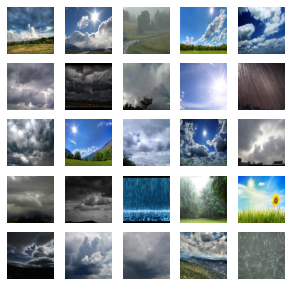

In [9]:
# Use this cell to view a few images from the training data set for each class

indices = np.random.randint(0, X_train.shape[0], size = 25)

images = X_train[indices]
labels = y_train[indices]

plt.figure(figsize = (5, 5))

for i in range(len(indices)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    image = image.astype('float32') / 255
    plt.imshow(image)
    plt.axis('off')

plt.show()
plt.close('all')

Print the number of training and testing data points available to you.

In [10]:
# Use this cell to inspect the number of training and testing data points available

print('number of data points in X_train is ', len(X_train))
print('number of data points in X_test is ', len(X_test))

number of data points in X_train is  505
number of data points in X_test is  45


Store the number of classes in this classification exercise.

In [11]:
# Use this cell to extract and store the total class count

# Extract and store the total class count
subfolders = [f for f in os.listdir(train_dir)]
n_classes = len(subfolders)
print('Number of classes =', n_classes)

Number of classes = 3


Print the number of data points from each class in the training and testing data sets.

In [12]:
# Use this cell to inspect the number of training and testing data points available in each class

subfolders_train = [f for f in os.listdir(train_dir)]
subfolders_test = [f for f in os.listdir(test_dir)]

train_counts = []
test_counts = []

for subfolder in subfolders_train:
    file_path = os.path.join(train_dir, subfolder)
    files = [f for f in os.listdir(file_path)]
    train_counts.append(len(files))
    print('The number of files in train set of subfolder:', subfolder, 'is', len(files))
    
for subfolder in subfolders_test:
    file_path = os.path.join(test_dir, subfolder)
    files = [f for f in os.listdir(file_path)]
    test_counts.append(len(files))
    print('The number of files in test set of subfolder:', subfolder, 'is', len(files))

The number of files in train set of subfolder: cloudy is 285
The number of files in train set of subfolder: rainy is 70
The number of files in train set of subfolder: sunny is 150
The number of files in test set of subfolder: cloudy is 15
The number of files in test set of subfolder: rainy is 15
The number of files in test set of subfolder: sunny is 15


Finally, visualze the class balance in the training data set.

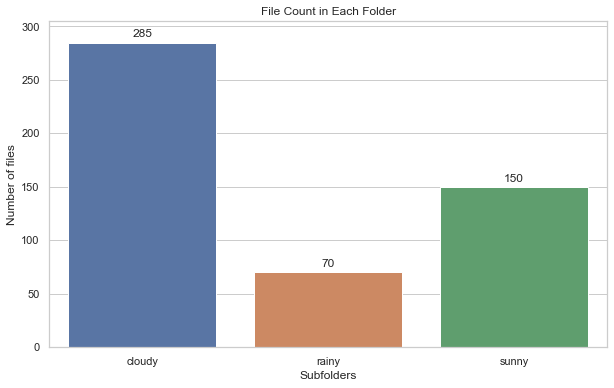

In [13]:
# Use this cell to visualize the class balance in the training data set

sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = subfolders_train, y = train_counts)
ax.set_xlabel('Subfolders')
ax.set_ylabel('Number of files')
ax.set_title('File Count in Each Folder')
ax.set_ylim([0, max(train_counts) + 20])
for i, count in enumerate(train_counts):
    ax.text(i, count + 5, str(count), ha='center')

plt.show()

### Checklist
- Viewed one sample image from each class for training and testing data sets
- Length of *X_train* is 505
- Length of *X_test* is 45
- The "cloudy" class has 285 data points in the training data set
- The "rainy" class has 70 data points in the training data set
- The "sunny" class has 150 data points in the training data set
- Created a visualization for class balance in the training data set

# Stage 2 - Data Preparation
In this stage, you will perform some basic essential data preparation methods on your image data so that they are ready for use in CNNs. 

To prepare the data, you will first need to resize the images in the training and testing data sets to the same size. This can be done using some methods provided to us in the *tensorflow* library. Second, you will convert the data into a format that is suitable to be fed into a Keras CNN model.

You will achieve this by completing the following tasks:
- Task 4 - Resize all images to the same dimension
- Task 5 - Prepare the data for feeding into CNN

## Task 4 - Resize all images to the same dimensions


### Description
In this task, you will resize all the images in your data set to the same dimensions. This is necessary because CNN models expect input images to have the same dimensions. 

You will first need to choose the dimensions of the resized images. It is recommened to reshape all the images to squares as it is easier to work with square images. Thererfore, to choose the side of the square, you need to inspect the dimensions of all the images in your data sets. You can pick any size that is smaller than the smallest image in the original data set as this generally ensures better data retention.

Note that resizing the image to the chosen dimension will have an impact on the rest of the assignment. Smaller image sizes will lead to less complex models and faster training, but the consequent data loss might lead to information loss, that might affect model performance. On the other hand, larger image dimensions will lead to more complex models and slower training, but there is lower risk of information loss, and that might lead to better model performance. You can change the dimensions of your resized images keeping in mind the trade off between performance and information loss.
For this, you can revisit this task after training a simple model try different image dimensions (that are smaller than the smallest dimension in the original data set). 

Once you have decided on the new size, you can use any method of your choice to obtain the smallest dimensions in the training and testing data set images.

Finally, you will save your training image list and the corresponding labels in new variables which can be accessed later. This is required because you will soon perform a set of data preprocessing steps on the training data, but when you get to the augmentation stage, you will need to retrieve the unprocessed training data.

### Requirements
- Find the smallest image dimension (considering both length and width) in both the training and the testing data sets.
- Choose the new dimensions for the images in the data set and save them in a variable *new_image_dims*.
- Define a function *resize_images()*:
    - The function must resize all the images in a list of images and return the updated list of images with the resized images. The function should be able to resize images in both the training and testing data sets.
    - The function should have the following keyword arguments:
        - *input_images*: A list of input images to be resized. Each input image must be a PIL image.
        - *new_dims*: An integer specifying the desired dimensions of the output images. Each output image will have the same height and width.
    - The function should return the following:
         - *resized_images*: A list of resized images. Each output image is a PIL image with the specified dimensions.
- Use the *resize_images()* function to resize images from the training and testing data sets.
- View an image from each class in the training and the testing data sets.
- Save the training data set containing resized images into new variables *X_pre_NN* and *y_pre_NN*. This is to retain the training data in its image format before proceeding with data preprocessing for CNNs.

### Recommendations
- You can use the *size* attribute of PIL Image objects to access the dimensions of an image in the form of a tuple.
- If you convert a list to a set, only the unique items in the list are present in the resultant set. You can use this to find out the unique image sizes in the data sets.
- Since you are reshaping images to squares, you can specify the new image dimension as a whole number instead of a tuple.
- You can use the *resize()* method from *tensorflow.image* to resize an image.
- You can use the *img_to_array()* method to convert an image to an array before using the *resize()* method on it.
- You can use the *array_to_img()* method to convert an array to an image after the *resize()* method operation.
- Start by resizing your images to 64 pixels by 64 pixels. You may revisit this after training a simple model to try different sizes.

First, obtain the smallest image dimensions in training and testing data sets.

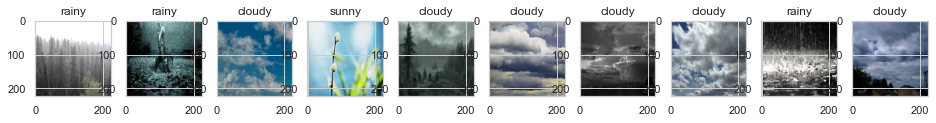

In [14]:
# View a few training data images and their corresponding labels

indices = np.random.randint(0, X_train.shape[0], size = 10)
plt.figure(figsize = (16, 8))

indexcount = 0
for data_index in indices:
    indexcount += 1
    image = X_train[data_index].astype(np.uint8)
    plt.subplot(1, 10, indexcount)
    plt.imshow(image)
    plt.title(str(y_train[data_index]))
    
plt.show()
plt.tight_layout()
plt.close('all')

In [15]:
train_smallest_width = float('inf')
train_smallest_height = float('inf')

# Iterate through training images
for folder_name in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder_name)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = load_img(img_path)
        width, height = img.size
        if width < train_smallest_width:
            train_smallest_width = width
        if height < train_smallest_height:
            train_smallest_height = height

test_smallest_width = float('inf')
test_smallest_height = float('inf')

# Iterate through testing images
for folder_name in os.listdir(test_dir):
    folder_path = os.path.join(test_dir, folder_name)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = load_img(img_path)
        width, height = img.size
        if width < test_smallest_width:
            test_smallest_width = width
        if height < test_smallest_height:
            test_smallest_height = height

print("Smallest width in training set:", train_smallest_width)
print("Smallest height in training set:", train_smallest_height)
print("Smallest width in testing set:", test_smallest_width)
print("Smallest height in testing set:", test_smallest_height)

Smallest width in training set: 158
Smallest height in training set: 111
Smallest width in testing set: 183
Smallest height in testing set: 160


Now define the *resize_images()* function.

In [16]:
# Use this cell to define a function that resizes image dimensions
from PIL import Image
# Define a function that resizes image dimensions
def resize_images(input_images, new_dims):
    '''
    Resizes all the images in a list to a square with its side given.

    Args:
        input_images: A list of images to be resized. Each input image 
            must be a PIL image.
        new_dims: An integer specifying the desired dimensions of the output 
            images. Each output image will have the same height and width.

    Returns:
        resized_images: A list of resized images. Each output image is a PIL 
            image with the specified dimensions.
    '''
    resized_images = []

    for img in input_images:
        img_pil = Image.fromarray(img.astype(np.uint8))
        resized_img_pil = img_pil.resize(new_dims)
        resized_img = np.array(resized_img_pil)
        resized_images.append(resized_img)
        
    return np.array(resized_images)

Next, decide on a new image dimension.


In [17]:
# Use this cell to set the new dimensions for all images

# Set the new dimensions for all images
new_image_dims = (56, 56)

Use the *resize_images()* method to resize your training and testing images.

In [18]:
# Use this cell to standardize the dimensions for all images in the training and testing data sets

# Standardize the dimensions for all images in the training data set
X_train = resize_images(X_train, new_image_dims)

# Standardize the dimensions for all images in the testing data set
X_test = resize_images(X_test, new_image_dims)

View some images from the resized data set.

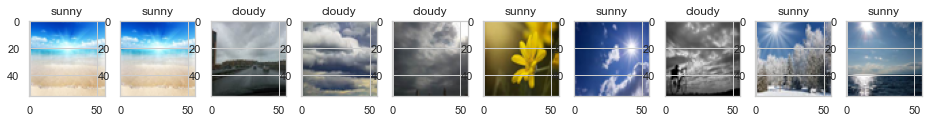

In [19]:
# Use this cell to view a few images from the training data set for each class

indices = np.random.randint(0, X_train.shape[0], size = 10)
plt.figure(figsize = (16, 8))

indexcount = 0
for data_index in indices:
    indexcount += 1
    plt.subplot(1, 10, indexcount)
    plt.imshow(X_train[data_index])
    plt.title(str(y_train[data_index]))
    
plt.show()
plt.tight_layout()
plt.close('all')

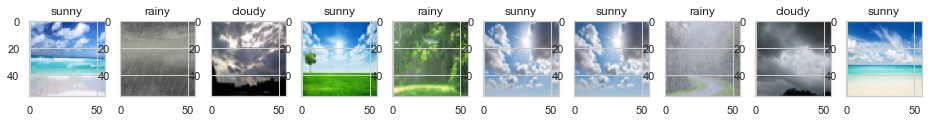

In [20]:
# Use this cell to view a few images from the testing data set for each class

indices = np.random.randint(0, X_test.shape[0], size = 10)
plt.figure(figsize = (16, 8))

indexcount = 0
for data_index in indices:
    indexcount += 1
    plt.subplot(1, 10, indexcount)
    plt.imshow(X_test[data_index])
    plt.title(str(y_test[data_index]))
    
plt.show()
plt.tight_layout()
plt.close('all')

Finally, save the resized data set into variables that will be useful later.

In [21]:
# Use this cell to store the resized images and labels for later use

# Store the resized images for later use
X_pre_NN = X_train

# Store the labels for later use
y_pre_NN = y_train

### Checklist
- Smallest image dimension in the training data is 111
- Smallest image dimension in the testing data is 160
- Defined the *resize_images()* function using the given keyword arguments and return variables
- Declared the new image dimension in a variable called *new_image_dims*
- Resized images in both *X_train* and *X_test*
- Saved the resized data sets into new variables for later use

## Task 5 - Prepare the data for feeding into CNN


### Description

In this section, you will perform a set of data preparation steps that enables CNNs to work on the data. Currently, *X_train* and *X_test* are lists of images, whereas *y_train* and *y_test* are lists of strings. Keras models can accept data in the form of *numpy* arrays. Therefore, you will convert the data into arrays.

For the input data, you need to convert the list of images into an *numpy* array. Note that the pixel gray levels are currently in the range $[0, 255]$. You will rescale these to $[0, 1]$. This is a common pre-processing step in image classification tasks, as it helps the model to converge faster during training.

For the output data, you will need to encode the different labels as one-hot encoded vectors.

### Requirements
- Convert *X_train* and *X_test* and their constituent images to *numpy* arrays.
- Scale *X_train* and *X_test* by divding the pixel values by 255.
- Perform one-hot encoding on *y_train* and *y_test*.
- Store the expected input shape for the CNN in a variable called *inputdims*.

### Recommendations
- You can convert images to arrays using the *img_to_array()* method.
- You can then convert the list of arrays into an array using the *numpy.array()* method.
- You can use the *LabelEncoder()* method to encode labels into integers You can then use the *to_categorical()* method to convert these integer labels into one-hot encoded vectors.

First, convert the input data into numpy arrays.

In [22]:
# Use this cell to convert the training and testing images into arrays

print(isinstance(X_train, np.ndarray))
print(isinstance(X_test, np.ndarray))

True
True


Now, rescale the data.

In [23]:
# Use this cell to rescale the training and testing images from the range [0, 255] to [0, 1]

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

Now convert the image labels to one-hot encoded vectors.

In [24]:
# Use this cell to one-hot encode the labels in the training and testing data sets

label_map = {'sunny': [1, 0, 0], 'cloudy': [0, 1, 0], 'rainy': [0, 0, 1]}

# Convert labels in y_train to one-hot encoded format
y_train = np.array([label_map[label] for label in y_train])
y_test = np.array([label_map[label] for label in y_test])

print(y_train.shape)
print(y_test.shape)

(505, 3)
(45, 3)


Finally, save the input dimensions for the CNNs in a variable so that you can call or refer to it when building CNN models.

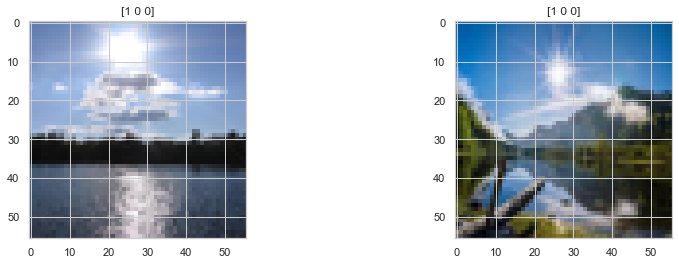

In [25]:
# viewing some images after one hot encoding and resizing
plt.figure(figsize = (14, 4))

for data_index in np.arange(0, 2, 1):
    plt.subplot(1, 2, data_index + 1)
    plt.imshow(X_train[data_index])
    plt.title(str(y_train[data_index]))

plt.show()
plt.tight_layout()
plt.close('all')

In [26]:
# Use this cell to store the input dimensions for the CNNs

# Store the input dimensions for the CNNs
inputdims = (56, 56, 3)

### Checklist
- *X_train* is an *ndarray* of shape $(505, 64, 64, 3)$
- *X_test* is an *ndarray* of shape $(45, 64, 64, 3)$
- Values in *X_train* and *X_test* range from $0$ to $1$
- *y_train* is an *ndarray* of shape $(505, 3)$
- *y_test* is an *ndarray* of shape $(45, 3)$
- Values in *y_train* and *y_test* are either $0$ or $1$
- *inputdims* contains the expected shape of the input for a CNN model, and is equal to $(64, 64, 3)$

# Stage 3 - Simple Model
In this stage, you will build, train and evaluate a basic CNN model on the data and analyze its performance. You will build the model using a function. This will help you change the configuration of your model during execution. You will also test the performance of the performance of the model by training it multiple times and then judging the distribution of final accuracies and loss values.

You will do all this with the help of the following tasks:
- Task 6 - Define a function to build a CNN model
- Task 7 - Create a simple CNN model and analyze its performance

## Task 6 - Define a function to build a CNN model


### Description
In this task, you will define a function that creates a CNN model, compiles it, and returns the compiled model.

You will need an easy way to create models with different configurations and hyperparameter values when you perform hyperparameter tuning. Therefore, it is useful to define a build function for your CNN model that let's you control the network configuration and returns the model. 

### Requirements
- Define a function *create_cnn()*:
    - This function creates and compiles a convolutional neural network (CNN) with the specified layers configuration and learning rate.
    - The function should have the following keyword arguments:
        - *layers_config*: A list of strings specifying the configuration of each layer in the CNN. This parameter should be interpreted by the function to add convolutional, pooling, flatten and dense layers along with their parameters such as filter size, filter stride, number of filters, number of neurons and so on, and a learning rate value parameter. 
        - *learning_rate_value*: A float specifying the learning rate to be used by the optimizer during training.
    - The function should return the following:
        - *cnn*: A compiled CNN with the specified configuration of layers and learning rate.

### Recommendations
- Consider an example for the *layers_config* variable. A *Conv2d()* layer may be represented using the string *c_4_3*. This could be interpreted as follows: *c* stands for the layer being a *Conv2D()* layer, 4 stands for the number of filters in the layer and 3 is used to define the size of the filter. Therefore if the string *c_4_3* is an item in the list *layers_config*, it should add the following layer: *Conv2D(filters = 4, kernel_size = 3)*. Similarly you can define string patterns for other layers.
- It is recommended to use the following specifications as fixed specifications of the CNN models:
    - The input layer can be fixed and the input dimensions that you saved in the variable *inputdims* can be provided into this layer.
    - The activation function for the dense layers may be fixed as ReLU.
    - The output layer can be fixed as a dense layer with the appropriate number of output neurons and the activation function for this layer can be fixed as Softmax.
    - When compiling the network, the loss function can be fixed as categorical crossentropy, the metric can be fixed as accuracy, and the optimizer type may be fixed as Adam.
    - Any other parameter that has not been explicitly mentioned in this assignment may be left at their default values.

Define the *create_cnn()* function.

In [27]:
# Use this cell to define a function that creates and compiles a CNN

# Define a function that creates and compiles a CNN
def create_cnn(n_filters = 1,
               filter_size = (3, 3),
               pool_filter_size = (2, 2)):
  
    cnn = Sequential()
    
    cnn.add(Conv2D(filters = n_filters,
                   kernel_size = filter_size,
                   input_shape = inputdims))
    
    cnn.add(MaxPooling2D(pool_size = pool_filter_size))
    
    cnn.add(Flatten())
    
    cnn.add(Dense(units = 128,
                  activation = 'sigmoid'))
    
    cnn.add(Dense(units = n_classes,
                  activation = 'softmax'))
   
    optimizer = Adam(learning_rate=0.01)
    
    cnn.compile(loss = 'categorical_crossentropy',
                metrics = ['accuracy'],
                optimizer = optimizer)
    
    return cnn

### Checklist
- Defined a function *create_cnn()* with given keyword arguments and return variables
- Followed the recommended specifications in the model

## Task 7 - Create a simple CNN model and analyze its performance

### Description

In this task, you will create a simple CNN model and train it on the training data multiple times and record its performance in each training iteration. You will then analyze the model's performance by summarizing its performance over the various training trials.

The reason why we want to train it multiple times is that your model may not train the same way each time. To get a good understanding of a model's performance, you need to train it a few times under the same settings and conditions and record its performance each time. You can then judge the model based on the distribution of its performances.

### Requirements
- Store the number of trials, number of epochs, and the validation split in variables called *num_trials*, *n_epochs*, and *val_split* respectively. These variables can be globally used throughout the code.
- Use the *create_cnn()* function to create a basic CNN model. You may start off with the following suggested network specifications:
    - A convolutional layer with 2 filters, each of size 3 and stride 1
    - A max pooling layer with size 2 and stride 1
    - Another convolutional layer with 4 filters, each of size 3 and stride 1
    - Another max pooling layer with size 2 and stride 1
    - A flatten layer
    - A dense layer with 8 neurons
- Build and train the network multiple times and record the performance of each training instance of the model in a data frame called *performance_df*. 

### Recommendations
- You may start off with 10 trials for the remainder of this assignment. You could rerun your code (once it is complete) and check your model performance for 10, 15, 20 trials and so on.
- You may start off with 10 epochs for the remainder of this assignment, but you are free to rerun your code (once it is complete) and check your results for 10, 15, 20 epochs and so on.
- We also recommend that you use a validation split fraction of 0.2 for all the model fit commands in this assignment.
- You may use any method of your choice to record the performance of your model over different trials, but you are advised to report the *performance_df* data frame in the format described below at the end of the complete training process.
  - For instance, if the number of training trials for a model is 3, then its performance data frame format should be as follows:
    - Index column name: Trial Number
    - Index column entries: 1, 2, 3, Mean, Median, Max
    - First column: Training Accuracy
    - Second column: Validation Accuracy

First, save the number of trials in a variable.

In [28]:
# Use this cell to set the number of trials for each model training instance

# Set the number of trials for each model training instance
num_trials = 10

Now save the number of epochs and the validation split in a variable.

In [29]:
# Use this cell to set the number of CNN training epochs and the validation split fraction

# Set the number of epochs for CNN training
n_epochs = 10

# Set the validation split fraction
val_split = 0.2

Finally, create train and evaluate your CNN model.

In [30]:
# Create an empty DataFrame to store performance
performance_df = pd.DataFrame(columns=['Trial Number', 'Training Accuracy', 'Validation Accuracy'])

for trial in range(1, num_trials+1):
    cnn_model = create_cnn(n_filters=2, filter_size=(3, 3), pool_filter_size=(2, 2))
    
    history = cnn_model.fit(X_train, y_train, epochs=n_epochs, validation_split=val_split)
    
    training_acc = history.history['accuracy'][-1]
    validation_acc = history.history['val_accuracy'][-1]
    
    performance_df = performance_df.append({
        'Trial Number': trial,
        'Training Accuracy': training_acc,
        'Validation Accuracy': validation_acc
    }, ignore_index=True)

performance_df.loc[num_trials] = ['Mean', performance_df['Training Accuracy'].mean(), performance_df['Validation Accuracy'].mean()]
performance_df.loc[num_trials+1] = ['Median', performance_df['Training Accuracy'].median(), performance_df['Validation Accuracy'].median()]
performance_df.loc[num_trials+2] = ['Max', performance_df['Training Accuracy'].max(), performance_df['Validation Accuracy'].max()]

print(performance_df)

Epoch 1/10
13/13 [==============================] - 3s 79ms/step - loss: 0.7808 - accuracy: 0.5891 - val_loss: 9.5646 - val_accuracy: 0.3069
Epoch 2/10
13/13 [==============================] - 1s 40ms/step - loss: 0.6576 - accuracy: 0.6807 - val_loss: 9.5243 - val_accuracy: 0.3069
Epoch 3/10
13/13 [==============================] - 0s 36ms/step - loss: 0.5333 - accuracy: 0.7599 - val_loss: 9.7461 - val_accuracy: 0.2871
Epoch 4/10
13/13 [==============================] - 1s 42ms/step - loss: 0.3957 - accuracy: 0.8366 - val_loss: 10.1710 - val_accuracy: 0.2871
Epoch 5/10
13/13 [==============================] - 1s 40ms/step - loss: 0.4040 - accuracy: 0.8119 - val_loss: 11.0351 - val_accuracy: 0.3069
Epoch 6/10
13/13 [==============================] - 1s 41ms/step - loss: 0.3597 - accuracy: 0.8540 - val_loss: 10.4089 - val_accuracy: 0.2574
Epoch 7/10
13/13 [==============================] - 1s 41ms/step - loss: 0.3166 - accuracy: 0.8738 - val_loss: 10.5751 - val_accuracy: 0.2772
Epoch 8/1

Epoch 9/10
13/13 [==============================] - 0s 39ms/step - loss: 0.3294 - accuracy: 0.8663 - val_loss: 8.4518 - val_accuracy: 0.2772
Epoch 10/10
13/13 [==============================] - 0s 37ms/step - loss: 0.3407 - accuracy: 0.8688 - val_loss: 8.3012 - val_accuracy: 0.2574
Epoch 1/10
13/13 [==============================] - 3s 76ms/step - loss: 0.7777 - accuracy: 0.5545 - val_loss: 9.4634 - val_accuracy: 0.3069
Epoch 2/10
13/13 [==============================] - 1s 40ms/step - loss: 0.5825 - accuracy: 0.7302 - val_loss: 8.8684 - val_accuracy: 0.3168
Epoch 3/10
13/13 [==============================] - 1s 42ms/step - loss: 0.4494 - accuracy: 0.8317 - val_loss: 7.8695 - val_accuracy: 0.2673
Epoch 4/10
13/13 [==============================] - 1s 42ms/step - loss: 0.3474 - accuracy: 0.8812 - val_loss: 10.1089 - val_accuracy: 0.2376
Epoch 5/10
13/13 [==============================] - 1s 43ms/step - loss: 0.3057 - accuracy: 0.8886 - val_loss: 9.2912 - val_accuracy: 0.2970
Epoch 6/10


In [31]:
performance_df

,Trial Number,Training Accuracy,Validation Accuracy
0,1.0,0.908416,0.247525
1,2.0,0.628713,0.306931
2,3.0,0.893564,0.178218
3,4.0,0.861386,0.277228
4,5.0,0.628713,0.306931
5,6.0,0.868812,0.257426
6,7.0,0.933168,0.287129
7,8.0,0.60396,0.306931
8,9.0,0.955446,0.287129
9,10.0,0.846535,0.277228


Looking at the *performance_df* data frame, you should be able to conclude that the model seems to be performing reasonably well on the training data, but its performance is very poor on the validation data.

There is a high likelihood that the class imbalance in the data set is contributing to this poor performance.

Also, it wouldn't be incorrect to say that the training data size is quite less.

One way to resolve these issues is to perform data augmentation. This will increase the size of the training data set so that the model will have enough data to train on. Using augmentation, we can also ensure that the classes in the training data are balanced.

### Checklist
- Saved values for number of trials, number of epochs, and validation split in variables
- Created and trained a simple CNN model multiple times and evaluated its performance
- Displayed the model's performance over multiple trials and the summary statistics in the given format

# Stage 4 - Data Augmentation
Data augmentation is a technique that is commonly used in deep learning to artificially increase the size of the training data set.

You can add augmented images to your your training data to improve the class balance in the training data set and also to increase the size of the training data.

In this stage, you will augment your training data to increase the training data size and improve the class balance in the training data set. You will then retrain your basic CNN model on the augmented data set and analyze its performance over multiple training trials.

In the first three tasks of this stage, you will write functions and helper functions to perform data augmentation. Whereas in the fourth task, you will use those functions to actually perform data augmentation. The tasks are given below:
- Task 8 - Create a transformed image
- Task 9 - Divide the data according to class
- Task 10 - Augment the data
- Task 11 - Create a simple CNN model using the augmented data and analyze its performance

## Task 8 - Create a transformed image

### Description
In the case of image classification, data augmentation is done by applying random transformations to the images in the training data set, such as rotation, flipping, and zooming. By doing so, the model is exposed to a greater variety of training samples, which can help improve its ability to generalize to unseen data.

In this task, you will define a function to randomly transform a given image using one of the predefined transformations. This function will be used later to augment the data. 

But recall that we performed some data preparation steps on our data set in Task 5. Recall also that we saved our data in two variables *X_pre_NN* and *y_pre_NN*. We will perform data augmentation using this unprocessed data.

### Requirements
- Retrieve the training data from the variables *X_pre_NN* and *y_pre_NN*.
- Define a function *random_transform()*:
    - This function takes in an input image and creates a new image out of it using some random augmentation technique.
    - The function should have the following keyword argument:
        - *input_image*: A PIL image object over which the random transformation will be applied.
    - The function should return the following:
        - *output_image*: A PIL image object, the augmented image.
- Verify the function by visualizing a few images before transformation and after transformation

### Recommendations
- You can retrieve the original data from the variables *X_pre_NN* and *y_pre_NN* and save them in the variables *X_train* and *y_train* respectively.
- In the *random_transform()* function, to create a new image from an existing image, you can use the *flip_left_right()*, the *flip_up_down()* and the *rot90()* methods from *tensorflow.image*.
- Recall that you will need to use the *img_to_array()* and the *array_to_img()* methods wherever applicable to perform various operations.
- You will have to introduce some randomness into the augmentation process so that your code randomly performs one of the following augmentations on the input image:
  - flip left and right
  - flip up and down
  - rotate 90 degrees (either clockwise or counter-clockwise) once, twice, or thrice

Retrieve the training data that you saved in an earlier stage before conducting data preparation on it for feeding into CNNs.

In [32]:
# Use this cell to retrieve the training data that you saved in an earlier stage

# Retrieve the training images
X_train = X_pre_NN

# Retrieve the training labels
y_train = y_pre_NN

Now, define the function *random_transform()* that takes in an image and creates a new image from it using a random transformation.

In [33]:
# Use this cell to define a function that takes in an input image and creates a new image out of it using some random augmentation
import random
# Define a function that takes in an input image and creates a new image out of it using some random augmentation
def random_transform(input_image):
    """
    Takes in an input image and creates a new image out of it using a  
        random transformation.
    Args:
        input_image: A PIL image object.

    Returns:
        output_image: A PIL image object, the augmented image.
    """
    input_array = tensorflow.keras.preprocessing.image.img_to_array(input_image)

    random_choice = random.choice(['a', 'b', 'c'])
    if random_choice == 'a':
        output_image = np.fliplr(input_array)
    elif random_choice == 'b':
        output_image = np.flipud(input_array)
    else:
        output_image = np.rot90(input_array)

    return output_image

You can now test your function on any input image and view the results. Note that if you defined your function correctly, each time you run the following cell, a random augmentation would be performed.

### Checklist
- Retrieved data stored in *X_pre_NN* and *y_pre_NN*
- Defined the *random_transform()* function using the keyword arguments and return variables described above
- Experimented with the *random_transform()* function and verified that the function randomly augments an input image

## Task 9 - Divide the data by class


### Description

Recall the countplot that you created earlier that represented the number of elements in the training data set belonging ot the different classes.

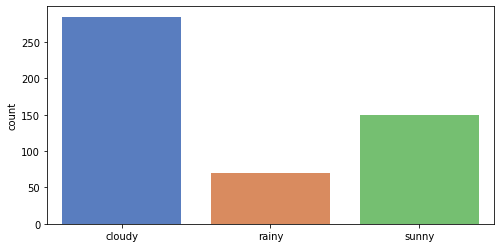

As you have seen before in the bar graph given above, there is class imbalance in the data set. Moreover, the total number of records in the train data set is small at 550. Since we want to augment the training data such that all the classes have the same number of samples, we need to create new images for the different classes separately as we will need to increase the number of images in the three data sets by a different number in each data set. So, it is benefical to define a helper function that divides the training data into its respective classes.

In this task, you will define the *divide_data_by_class()* helper function that does this.

The main function will then use these two helper functions (*random_transform()* and *divide_data_by_class()*) to augment the training data set with additional images such that: 
1.   All the classes have the same number of samples
2.   The total amount of training data is larger than the original training data set

Now, you will define the *divide_data_by_class()* helper function that divides the input images and their labels into sublists based on their corresponding class labels. Given the original list of all images and the list of their corresponding labels, as the output of this function, you need to create three lists of images and the respective three lists of labels corresponding to the three unique labels present in our data set. Before returning the data, you can save the three image lists in a list and the three label lists in another list.

### Requirements
- Visualize the class balance using a histogram.
- Define a function *divide_data_by_class()*:
    - This function divides the input images and labels into subsets based on their corresponding class labels.
    - The function should have the following keyword arguments:
        - *input_images*: A list of input images to be divided based on class labels. Each input image must be a PIL image.
        - *image_labels*: A list that contains corresponding labels for each image in input_images. Each label is a string.
    - The function should return the following:
        - *classwise_images*: A list of lists, where each sublist contains the input images corresponding to a unique class label.
        - *classwise_labels*: A list of lists, where each sublist contains the labels corresponding to the input images in classwise_images list.


### Recommendations

- In the *divide_data_by_class()* function, to divide the training data set into respective classes, you will need the unique class labels and their frequencies. This can be obtained using the *numpy.unique()* method.


Visualize the class balance in the training data set using a bar plot or a count plot.

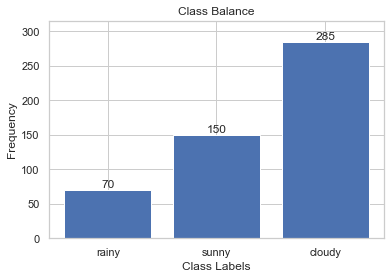

In [63]:
# Use this cell to visualize the class balance in the training data set

# Count the occurrences of each class
class_counts = {label: np.count_nonzero(y_train == label) for label in set(y_train)}

# Extract the class labels and their respective counts
labels = list(class_counts.keys())
counts = list(class_counts.values())

# Plot the histogram
plt.bar(labels, counts)
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Class Balance')
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.ylim(0, max(counts) + 30)

plt.show()


You can see that the classes in the training data are quite imbalanced. Moreover, the number of training samples is quite small as well.

Now, define the function *divide_data_by_class()* that divides the input images and labels into subsets based on their corresponding class labels.

In [35]:
# Use this cell to define a function that takes in the list of training images and labels and returns them class-wise

# Define a function that takes in the list of training images and returns them class-wise
def divide_data_by_class(input_images, image_labels):
    '''
    Divides the input images and labels into subsets based on their corresponding class labels.

    Args:
        input_images: A list of input images to be divided based on class 
            labels. Each input image must be a PIL image.
        image_labels: A list that contains corresponding labels for each 
            image in input_images. Each label is a string.

    Returns:
        classwise_images: A list of lists, where each sublist contains the 
            input images corresponding to a unique class label.
        classwise_labels: A list of lists, where each sublist contains the 
            labels corresponding to the input images in classwise_images list.
    '''
    unique_labels, label_counts = np.unique(image_labels, return_counts=True)
    
    # Create empty lists to store classwise images and labels
    classwise_images = [[] for _ in unique_labels]
    classwise_labels = [[] for _ in unique_labels]
    
    # Divide the input images and labels based on their class
    for image, label in zip(input_images, image_labels):
        class_index = np.where(unique_labels == label)[0][0]
        classwise_images[class_index].append(image)
        classwise_labels[class_index].append(label)
    

    return classwise_images, classwise_labels

You can now use the *divide_data_by_class()* function on the data set and view the results.

In [36]:
# Use this cell to divide the training data into its respective classes and labels
# Note: This is a sample execution and the actual augmentation function will be defined in Task 10

classwise_images, classwise_labels = divide_data_by_class(X_train, y_train)

### Checklist
- Visualized class balance in the data set
- The *divide_data_by_class()* function returns two lists that contain three lists each
- Experimented with the *divide_data_by_class()* function and ensured that it is functioning properly

## Task 10 - Augment the training data

### Description

With these two functions, *random_transform()* and *divide_data_by_class()* in hand, you can define the main augmentation function called *augment_data()*. This function takes in an image data set and the factor by which the data set needs to be augmented. This function should:
1. Divide the data set into different classes using the *divide_data_by_class()* function.
2. Calculate the final size of each class. This is done by multiplying the factor by the size of the largest class.
3. Use the *random_transform()* function to create images till all three classes achieve the required size.

After defining the function, try augmenting the data set and visualize the class balance again to verify your results

### Requirements
- Define a function *augment_data()*:
    - This function augments the training data by applying random transformations until all classes in the training data have the same number of data points and ensures that the number of data points in each class is a multiple of the size of the largest class in the original data set. The multiplication factor is user-controlled.
    - The function should have the following keyword arguments:
        - *input_images*: A list of input images.
        - *image_labels*: A list of labels for the input images.
        - *data_size_factor*: A scaling factor for the size of the augmented data. This will be used to calculate the final size of each class by multiplying *data_size_factor* with the size of the largest class and then rounding to the nearest integer.
- Use the *augment_data()* function to augment the training data set.
- Visualize the class balance using a histogram after augmentation.

### Recommendations
- In the *augment_data()* function, use the *divide_data_by_class()* function that you defined earlier to divide the input data into their respective classes. This way, it should be easier for you to bring all the classes to the same size using the *random_transform()* function that you defined earlier.
- You will need to introduce some randomness into your code so that a random image from the original data set is selected for augmentation each time.
- You should also ensure that an augmented image is ***not*** considered for augmentation again.
- The data size incrementation factor parameter can be considered as a kind of multiplier, that is, if your original class balance is **[x, y, z]** where **x**, **y** and **z** are the numbers of data points in each of the classes, and **x** is the largest for instance, and your parameter value is 2, then the output class balance should be **[2x, 2x, 2x]**.
- After the class-wise augmentation is done, remember to put everything together into a single list of augmented training images (similarly for the list of labels).

Define the *augment_data()* function that works on the original training data and produces an augmented training data set from it.

In [37]:
# Use this cell to define a function that augments the training data

# Define a function to augment the training data
def augment_data(input_images, image_labels, data_size_factor):
    '''
    Augments the training data by randomly applying data augmentation techniques.

    Args:
        input_images: A list of input images.
        image_labels: A list of labels for the input images.
        data_size_factor: A scaling factor for the size of the augmented data.
            This will be used to calculate the final size of each class by 
            multiplying data_size_factor with the size of the largest class and 
            then rounding to the nearest integer.

    Returns:
        new_images: The augmented images
        new_labels: The labels corresponding to the new images
    '''   
    # Get the unique class labels and their frequencies
    unique_labels = np.unique(image_labels)
    label_counts = [len(class_images) for class_images in classwise_images]
    
    # Calculate the final size of each class
    target_size = int(round(max(label_counts) * data_size_factor))
    
    # Augment the data until all classes reach the target size
    augmented_images = []
    augmented_labels = []
    for class_images, class_labels in zip(classwise_images, classwise_labels):
        num_additional = target_size - len(class_images)
        while num_additional > 0:
            # Randomly select an image from the class for augmentation
            random_index = random.randint(0, len(class_images) - 1)
            image = class_images[random_index]
            label = class_labels[random_index]
            
            # Apply random transformations using the random_transform() function
            augmented_image = random_transform(image)
            
            # Append the augmented image and label to the lists
            augmented_images.append(augmented_image)
            augmented_labels.append(label)
            
            num_additional -= 1
    
    augmented_images = np.array(augmented_images)
    augmented_labels = np.array(augmented_labels)
    
    # Combine the original and augmented data
    augmented_images = np.concatenate([input_images, augmented_images], axis=0)
    augmented_labels = np.concatenate([image_labels, augmented_labels], axis=0)
    
    return augmented_images, augmented_labels

Use the *augment_data()* function to augment the training data.

In [38]:
# Use this cell to augment your training data

# Define the scaling factor for data augmentation
data_size_factor = 2

# Augment the training data
new_X_train, new_y_train = augment_data(X_train, y_train, data_size_factor)

In [39]:
X_train, y_train = new_X_train, new_y_train

Visualize the class balance in the augmented training data set using a bar plot or a count plot.

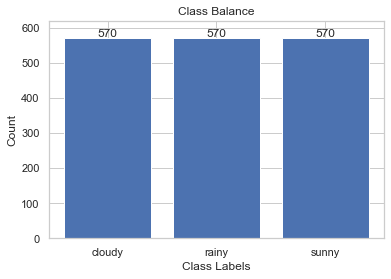

In [59]:
# Use this cell to visualize the class balance in the training data set

labels = np.unique(y_train)
counts = [sum(y_train == class_img) for class_img in labels]


plt.bar(labels, counts)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Balance')
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.ylim(0, max(counts) + 50)

plt.show()

### Checklist
- Experimented with the *augment_data()* function and made sure that it is working properly
  - For example, if the *augment_data()* function is used on the original training data with a *data_size_factor* of 1, each class in the output data has 285 images, and the total number of images in the new list is 855. If *data_size_factor* was 2 instead, then each class in the output data has 570 images, and the total number images in the new list is 1710.
- Decided on a suitable value for the augmentation factor and augmented the training data

## Task 11 - Create a simple CNN model using the augmented data and analyze its performance


### Description
In this task, you will retrain your simple CNN model multiple times using the augmented data and record its performance in each training instance. You will then analyze its performance by summarizing its performance over the multiple training trials.

But before you do that, you will need to perform all the data prepration steps that you did earlier so that the data is ready to be fed into CNNs.

### Requirements
- Perform the data preparation steps from Stage 2 again.
- Create, train, and analyze the performance of a simple CNN model.

### Recommendations
- You may reuse code from Task 5 for data preparation, but make sure that all the variable names are correct.
- You may reuse code from Task 7 to create, train, and analyze the performance of the model, but make sure that all the variable names are correct.
- You may want to try augmenting your data using different values for *data_size_factor* to improve the accuracy of your model.

In [41]:
# Use this cell to convert the training images into arrays

print(isinstance(X_train, np.ndarray))
print(isinstance(y_train, np.ndarray))

True
True


In [42]:
# Use this cell to rescale the training images from the range [0, 255] to [0, 1]

X_train = X_train.astype('float32') / 255

In [43]:
# Use this cell to one-hot encode the labels in the training data set

label_map = {'sunny': [1, 0, 0], 'cloudy': [0, 1, 0], 'rainy': [0, 0, 1]}

# Convert labels in y_train to one-hot encoded format
y_train = np.array([label_map[label] for label in y_train])

print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(1710, 3)
(45, 3)
(1710, 56, 56, 3)
(45, 56, 56, 3)


In [44]:
# Use this cell to create, train and evaluate your simple CNN model on the augmented data multiple times and store the performance results

# Create an empty DataFrame to store performance
performance_df = pd.DataFrame(columns=['Trial Number', 'Training Accuracy', 'Validation Accuracy'])

for trial in range(1, num_trials+1):
    cnn_model = create_cnn(n_filters=2, filter_size=(3, 3), pool_filter_size=(2, 2))
    
    history = cnn_model.fit(X_train, y_train, epochs=n_epochs, validation_split=val_split)
    
    training_acc = history.history['accuracy'][-1]
    validation_acc = history.history['val_accuracy'][-1]
    
    performance_df = performance_df.append({
        'Trial Number': trial,
        'Training Accuracy': training_acc,
        'Validation Accuracy': validation_acc
    }, ignore_index=True)

performance_df.loc[num_trials] = ['Mean', performance_df['Training Accuracy'].mean(), performance_df['Validation Accuracy'].mean()]
performance_df.loc[num_trials+1] = ['Median', performance_df['Training Accuracy'].median(), performance_df['Validation Accuracy'].median()]
performance_df.loc[num_trials+2] = ['Max', performance_df['Training Accuracy'].max(), performance_df['Validation Accuracy'].max()]

Epoch 1/10
43/43 [==============================] - 3s 51ms/step - loss: 1.1467 - accuracy: 0.4934 - val_loss: 1.8844 - val_accuracy: 0.4503
Epoch 2/10
43/43 [==============================] - 2s 42ms/step - loss: 0.8507 - accuracy: 0.5475 - val_loss: 0.7601 - val_accuracy: 0.7602
Epoch 3/10
43/43 [==============================] - 2s 42ms/step - loss: 0.8262 - accuracy: 0.5629 - val_loss: 0.7915 - val_accuracy: 0.7544
Epoch 4/10
43/43 [==============================] - 2s 42ms/step - loss: 0.7833 - accuracy: 0.6199 - val_loss: 2.6301 - val_accuracy: 0.0205
Epoch 5/10
43/43 [==============================] - 2s 44ms/step - loss: 0.8376 - accuracy: 0.5980 - val_loss: 1.2805 - val_accuracy: 0.5760
Epoch 6/10
43/43 [==============================] - 2s 44ms/step - loss: 0.7684 - accuracy: 0.6323 - val_loss: 1.4870 - val_accuracy: 0.5175
Epoch 7/10
43/43 [==============================] - 2s 43ms/step - loss: 0.7025 - accuracy: 0.6806 - val_loss: 0.9028 - val_accuracy: 0.7251
Epoch 8/10
43

43/43 [==============================] - 1s 35ms/step - loss: 0.6941 - accuracy: 0.6915 - val_loss: 2.1169 - val_accuracy: 0.2368
Epoch 9/10
43/43 [==============================] - 1s 35ms/step - loss: 0.6288 - accuracy: 0.7200 - val_loss: 1.6759 - val_accuracy: 0.3655
Epoch 10/10
43/43 [==============================] - 2s 38ms/step - loss: 0.5691 - accuracy: 0.7537 - val_loss: 0.8909 - val_accuracy: 0.6257
Epoch 1/10
43/43 [==============================] - 3s 46ms/step - loss: 1.5290 - accuracy: 0.4386 - val_loss: 1.3896 - val_accuracy: 0.5263
Epoch 2/10
43/43 [==============================] - 2s 37ms/step - loss: 0.7883 - accuracy: 0.6287 - val_loss: 1.2643 - val_accuracy: 0.5965
Epoch 3/10
43/43 [==============================] - 2s 36ms/step - loss: 0.7928 - accuracy: 0.6031 - val_loss: 1.2920 - val_accuracy: 0.5673
Epoch 4/10
43/43 [==============================] - 2s 39ms/step - loss: 0.7107 - accuracy: 0.6776 - val_loss: 1.5684 - val_accuracy: 0.4357
Epoch 5/10
43/43 [=====

In [45]:
performance_df

,Trial Number,Training Accuracy,Validation Accuracy
0,1.0,0.746345,0.540936
1,2.0,0.898392,0.473684
2,3.0,0.935673,0.704678
3,4.0,0.42617,0.0
4,5.0,0.609649,0.497076
5,6.0,0.753655,0.625731
6,7.0,0.928363,0.74269
7,8.0,0.41155,0.0
8,9.0,0.914474,0.763158
9,10.0,0.964181,0.663743


You should be able to observe, from the performance data frame, that the basic CNN model that is trained on the augmented data performs better, in general, than the basic CNN model that you trained earlier.

### Checklist
- Converted the augmented input data into arrays
- Scaled the augmented input data
- Encoded the output data as integers
- Performed one-hot encoding on output data
- Retrained the simple CNN model on the augmented data
- Created a data frame to analyze the performance of the model

# Stage 5 - Optimal Model
In this stage, you will train your CNN model on the augmented data set and tune it for network structure and learning rate. You will do this by completing Task 12 - Tune the CNN Model.

## Task 12 - Tune the CNN Model

### Description

In this task, you will train your CNN model on the augmented data set and tune it for network structure and learning rate.

A grid search is not recommended here since we are working with sparse data. Instead, it is recommended to use simple loops and record the performance of the various model specifications. This also ensures that the same validation split and consequently the same validation data is used, so the model performance analyses are not biased, at least within the context of this assignment.

Additionally note that you are required to restrict the complexity of your model. In general, more complex networks have a higher likelihood of overfitting. As part of this assignment, you are required to make sure that your networks contain no more than 500,000 trainable parameters.

Note that you are required to report a performance data frame as you did earlier for each of the model specifications that you consider in this stage. You are free to report these as separate data frames or within a single data frame.

For instance, if you consider 2 values for network configuration and 2 values for learning rate, then there are 4 unique model specifications. Consequently, you must train each of these model types multiple times (as specified earlier) and record the performance in each trial. You may, therefore, report 4 separate data frames (whose format you should be familiar with by this stage) or a single data frame that contains all the necessary information.

### Requirements
- Tune your model using loops and record the training and validation accuracies of each model over multiple runs.
- Tune for at least two network configurations that are saved in the list *layers_config_list* (this includes the default configuration that you have been using up until this point).
- Tune for at least two values of learning rate that are saved in the list *learning_rate_list* (this includes the default learning rate value of 0.001 that you have been using up until now).
- Remember to tune for combinations of these hyperparameters (do not tune for them individually).
- Ensure that the number of trainable parameters in your optimal model does not exceed 500,000.
- Report your findings from the tuning process in the form of data frame(s).
- Save the optimal values for network config and learning rate in variables called *optimal_layer_config* and *optimal_learning_rate* respectively.

### Recommendations
- You will need to train multiple models for each set of hyperparameter values to get a reliable estimate of the performance.
- Saving the output of the *.fit()* method allows you to access the values of the metrics.

Tune your CNN model for network structure and learning rate.

In [46]:
# Use this cell to tune your CNN model for network structure and learning rate
num_trials = 5
n_epochs = 5

filter_size_list = [(3, 3), (5, 5)]
pool_size_list = [(2, 2), (4, 4), (7, 7)]
n_filters_list = [1, 4, 16]
learning_rate_list = [0.01, 0.001]

performance_dfs = []
for filter_size in filter_size_list:
    for pool_size in pool_size_list:
        for n_filters in n_filters_list:
            for learning_rate in learning_rate_list:
                train_accs = []
                val_accs = []

                for trial in range(num_trials):
                    model = create_cnn(n_filters = n_filters,
                                       filter_size = filter_size,
                                       pool_filter_size = pool_size)

                    optimizer = Adam(learning_rate=learning_rate)
                    model.compile(loss='categorical_crossentropy',
                                  optimizer=optimizer,
                                  metrics=['accuracy'])

                    history = model.fit(X_train, y_train, epochs=n_epochs, validation_split=val_split)

                    train_acc = history.history['accuracy'][-1]
                    val_acc = history.history['val_accuracy'][-1]
                    train_accs.append(train_acc)
                    val_accs.append(val_acc)

                performance_df = pd.DataFrame({'Trial': range(1, num_trials+1),
                                               'Training Accuracy': train_accs,
                                               'Validation Accuracy': val_accs})

                performance_dfs.append(performance_df)

all_performance_df = pd.concat(performance_dfs, ignore_index=True)

Epoch 1/5
43/43 [==============================] - 4s 40ms/step - loss: 1.2132 - accuracy: 0.4956 - val_loss: 1.9984 - val_accuracy: 0.2573
Epoch 2/5
43/43 [==============================] - 1s 28ms/step - loss: 0.8675 - accuracy: 0.5629 - val_loss: 1.9134 - val_accuracy: 0.3947
Epoch 3/5
43/43 [==============================] - 1s 29ms/step - loss: 0.7607 - accuracy: 0.6396 - val_loss: 1.7708 - val_accuracy: 0.4854
Epoch 4/5
43/43 [==============================] - 1s 32ms/step - loss: 0.7109 - accuracy: 0.6645 - val_loss: 1.2674 - val_accuracy: 0.5585
Epoch 5/5
43/43 [==============================] - 1s 32ms/step - loss: 0.6559 - accuracy: 0.6944 - val_loss: 1.6859 - val_accuracy: 0.3713
Epoch 1/5
43/43 [==============================] - 3s 40ms/step - loss: 1.2663 - accuracy: 0.3911 - val_loss: 1.3417 - val_accuracy: 0.0000e+00
Epoch 2/5
43/43 [==============================] - 1s 31ms/step - loss: 1.0593 - accuracy: 0.4240 - val_loss: 1.6229 - val_accuracy: 0.0000e+00
Epoch 3/5
43

Epoch 4/5
43/43 [==============================] - 2s 40ms/step - loss: 1.0396 - accuracy: 0.4174 - val_loss: 2.2387 - val_accuracy: 0.0000e+00
Epoch 5/5
43/43 [==============================] - 2s 41ms/step - loss: 1.0449 - accuracy: 0.4211 - val_loss: 1.6249 - val_accuracy: 0.0000e+00
Epoch 1/5
43/43 [==============================] - 4s 52ms/step - loss: 1.4410 - accuracy: 0.4284 - val_loss: 1.2789 - val_accuracy: 0.0000e+00
Epoch 2/5
43/43 [==============================] - 2s 43ms/step - loss: 1.0540 - accuracy: 0.4218 - val_loss: 2.5491 - val_accuracy: 0.0000e+00
Epoch 3/5
43/43 [==============================] - 2s 41ms/step - loss: 1.0508 - accuracy: 0.3962 - val_loss: 1.6461 - val_accuracy: 0.0000e+00
Epoch 4/5
43/43 [==============================] - 2s 36ms/step - loss: 1.0536 - accuracy: 0.4298 - val_loss: 1.4929 - val_accuracy: 0.0000e+00
Epoch 5/5
43/43 [==============================] - 2s 39ms/step - loss: 1.0530 - accuracy: 0.4145 - val_loss: 1.8875 - val_accuracy: 0.0

Epoch 2/5
43/43 [==============================] - 3s 66ms/step - loss: 1.0411 - accuracy: 0.4167 - val_loss: 1.5984 - val_accuracy: 0.0000e+00
Epoch 3/5
43/43 [==============================] - 3s 65ms/step - loss: 1.0753 - accuracy: 0.4130 - val_loss: 1.7669 - val_accuracy: 0.0000e+00
Epoch 4/5
43/43 [==============================] - 3s 65ms/step - loss: 1.0522 - accuracy: 0.4262 - val_loss: 2.0996 - val_accuracy: 0.0000e+00
Epoch 5/5
43/43 [==============================] - 3s 63ms/step - loss: 1.0496 - accuracy: 0.4137 - val_loss: 2.1937 - val_accuracy: 0.0000e+00
Epoch 1/5
43/43 [==============================] - 5s 74ms/step - loss: 1.2962 - accuracy: 0.3721 - val_loss: 1.5346 - val_accuracy: 0.0000e+00
Epoch 2/5
43/43 [==============================] - 3s 66ms/step - loss: 1.0529 - accuracy: 0.4028 - val_loss: 1.5375 - val_accuracy: 0.0000e+00
Epoch 3/5
43/43 [==============================] - 3s 67ms/step - loss: 1.0471 - accuracy: 0.4320 - val_loss: 1.9665 - val_accuracy: 0.0

43/43 [==============================] - 1s 29ms/step - loss: 0.7723 - accuracy: 0.6206 - val_loss: 0.9456 - val_accuracy: 0.7602
Epoch 1/5
43/43 [==============================] - 2s 23ms/step - loss: 0.9936 - accuracy: 0.4225 - val_loss: 1.2729 - val_accuracy: 0.3567
Epoch 2/5
43/43 [==============================] - 1s 26ms/step - loss: 0.8767 - accuracy: 0.5534 - val_loss: 0.9520 - val_accuracy: 0.6930
Epoch 3/5
43/43 [==============================] - 1s 29ms/step - loss: 0.8304 - accuracy: 0.5746 - val_loss: 1.2204 - val_accuracy: 0.6023
Epoch 4/5
43/43 [==============================] - 1s 29ms/step - loss: 0.8074 - accuracy: 0.5914 - val_loss: 1.2665 - val_accuracy: 0.6257
Epoch 5/5
43/43 [==============================] - 1s 32ms/step - loss: 0.7930 - accuracy: 0.6053 - val_loss: 1.5213 - val_accuracy: 0.5351
Epoch 1/5
43/43 [==============================] - 3s 40ms/step - loss: 1.0206 - accuracy: 0.4934 - val_loss: 1.8133 - val_accuracy: 0.0000e+00
Epoch 2/5
43/43 [=========

43/43 [==============================] - 2s 35ms/step - loss: 0.7520 - accuracy: 0.6564 - val_loss: 1.9620 - val_accuracy: 0.2836
Epoch 4/5
43/43 [==============================] - 2s 36ms/step - loss: 0.7338 - accuracy: 0.6886 - val_loss: 1.7204 - val_accuracy: 0.4795
Epoch 5/5
43/43 [==============================] - 2s 37ms/step - loss: 0.7041 - accuracy: 0.6966 - val_loss: 0.8746 - val_accuracy: 0.7632
Epoch 1/5
43/43 [==============================] - 3s 43ms/step - loss: 0.9536 - accuracy: 0.5212 - val_loss: 1.4671 - val_accuracy: 0.2485
Epoch 2/5
43/43 [==============================] - 2s 37ms/step - loss: 0.8296 - accuracy: 0.6001 - val_loss: 0.9457 - val_accuracy: 0.6491
Epoch 3/5
43/43 [==============================] - 1s 33ms/step - loss: 0.7642 - accuracy: 0.6674 - val_loss: 1.4669 - val_accuracy: 0.5088
Epoch 4/5
43/43 [==============================] - 1s 30ms/step - loss: 0.7247 - accuracy: 0.6966 - val_loss: 1.5351 - val_accuracy: 0.5292
Epoch 5/5
43/43 [=============

Epoch 1/5
43/43 [==============================] - 3s 45ms/step - loss: 0.9552 - accuracy: 0.5197 - val_loss: 1.6995 - val_accuracy: 0.2690
Epoch 2/5
43/43 [==============================] - 2s 42ms/step - loss: 0.7330 - accuracy: 0.6806 - val_loss: 1.1030 - val_accuracy: 0.6520
Epoch 3/5
43/43 [==============================] - 2s 42ms/step - loss: 0.6960 - accuracy: 0.6915 - val_loss: 1.0264 - val_accuracy: 0.6930
Epoch 4/5
43/43 [==============================] - 2s 42ms/step - loss: 0.6343 - accuracy: 0.7288 - val_loss: 1.2323 - val_accuracy: 0.6140
Epoch 5/5
43/43 [==============================] - 2s 41ms/step - loss: 0.5734 - accuracy: 0.7646 - val_loss: 1.2492 - val_accuracy: 0.5877
Epoch 1/5
43/43 [==============================] - 4s 51ms/step - loss: 1.0742 - accuracy: 0.4898 - val_loss: 1.8141 - val_accuracy: 0.2105
Epoch 2/5
43/43 [==============================] - 2s 42ms/step - loss: 0.8083 - accuracy: 0.6557 - val_loss: 2.1501 - val_accuracy: 0.2456
Epoch 3/5
43/43 [===

43/43 [==============================] - 1s 27ms/step - loss: 0.8951 - accuracy: 0.5373 - val_loss: 1.4415 - val_accuracy: 0.3801
Epoch 5/5
43/43 [==============================] - 1s 29ms/step - loss: 0.8676 - accuracy: 0.5753 - val_loss: 1.4379 - val_accuracy: 0.3509
Epoch 1/5
43/43 [==============================] - 3s 40ms/step - loss: 0.9867 - accuracy: 0.5124 - val_loss: 2.7617 - val_accuracy: 0.0848
Epoch 2/5
43/43 [==============================] - 1s 32ms/step - loss: 0.8001 - accuracy: 0.6111 - val_loss: 1.2424 - val_accuracy: 0.6170
Epoch 3/5
43/43 [==============================] - 1s 32ms/step - loss: 0.6938 - accuracy: 0.7178 - val_loss: 1.0584 - val_accuracy: 0.5906
Epoch 4/5
43/43 [==============================] - 1s 32ms/step - loss: 0.6070 - accuracy: 0.7383 - val_loss: 0.9995 - val_accuracy: 0.6462
Epoch 5/5
43/43 [==============================] - 1s 30ms/step - loss: 0.5476 - accuracy: 0.7792 - val_loss: 1.3142 - val_accuracy: 0.3655
Epoch 1/5
43/43 [=============

43/43 [==============================] - 2s 37ms/step - loss: 0.7470 - accuracy: 0.6572 - val_loss: 1.7735 - val_accuracy: 0.4737
Epoch 3/5
43/43 [==============================] - 2s 38ms/step - loss: 0.6841 - accuracy: 0.6959 - val_loss: 1.6680 - val_accuracy: 0.3041
Epoch 4/5
43/43 [==============================] - 1s 33ms/step - loss: 0.6321 - accuracy: 0.7259 - val_loss: 0.7784 - val_accuracy: 0.6725
Epoch 5/5
43/43 [==============================] - 1s 31ms/step - loss: 0.5501 - accuracy: 0.7785 - val_loss: 0.8499 - val_accuracy: 0.6082
Epoch 1/5
43/43 [==============================] - 3s 44ms/step - loss: 1.0142 - accuracy: 0.5161 - val_loss: 1.3035 - val_accuracy: 0.7047
Epoch 2/5
43/43 [==============================] - 2s 37ms/step - loss: 0.7575 - accuracy: 0.6425 - val_loss: 1.2030 - val_accuracy: 0.6228
Epoch 3/5
43/43 [==============================] - 2s 37ms/step - loss: 0.6324 - accuracy: 0.7288 - val_loss: 1.0718 - val_accuracy: 0.5643
Epoch 4/5
43/43 [=============

43/43 [==============================] - 2s 39ms/step - loss: 0.7079 - accuracy: 0.6901 - val_loss: 1.6440 - val_accuracy: 0.5117
Epoch 1/5
43/43 [==============================] - 3s 49ms/step - loss: 1.2989 - accuracy: 0.4298 - val_loss: 1.3034 - val_accuracy: 0.0000e+00
Epoch 2/5
43/43 [==============================] - 2s 41ms/step - loss: 1.0555 - accuracy: 0.4313 - val_loss: 1.7072 - val_accuracy: 0.0000e+00
Epoch 3/5
43/43 [==============================] - 2s 40ms/step - loss: 1.0431 - accuracy: 0.4130 - val_loss: 1.5395 - val_accuracy: 0.0000e+00
Epoch 4/5
43/43 [==============================] - 2s 40ms/step - loss: 1.0410 - accuracy: 0.4203 - val_loss: 2.0890 - val_accuracy: 0.0000e+00
Epoch 5/5
43/43 [==============================] - 2s 40ms/step - loss: 1.0379 - accuracy: 0.4357 - val_loss: 1.9872 - val_accuracy: 0.0000e+00
Epoch 1/5
43/43 [==============================] - 3s 48ms/step - loss: 1.1032 - accuracy: 0.4569 - val_loss: 1.4631 - val_accuracy: 0.5058
Epoch 2/5


Epoch 3/5
43/43 [==============================] - 2s 54ms/step - loss: 1.0529 - accuracy: 0.3947 - val_loss: 2.5940 - val_accuracy: 0.0000e+00
Epoch 4/5
43/43 [==============================] - 2s 54ms/step - loss: 1.0514 - accuracy: 0.4298 - val_loss: 1.9751 - val_accuracy: 0.0000e+00
Epoch 5/5
43/43 [==============================] - 2s 54ms/step - loss: 1.0443 - accuracy: 0.4159 - val_loss: 1.2351 - val_accuracy: 0.0000e+00
Epoch 1/5
43/43 [==============================] - 4s 57ms/step - loss: 0.9582 - accuracy: 0.5285 - val_loss: 1.0618 - val_accuracy: 0.5702
Epoch 2/5
43/43 [==============================] - 2s 51ms/step - loss: 0.7303 - accuracy: 0.6901 - val_loss: 1.4846 - val_accuracy: 0.4971
Epoch 3/5
43/43 [==============================] - 2s 50ms/step - loss: 0.6874 - accuracy: 0.7076 - val_loss: 0.8355 - val_accuracy: 0.7398
Epoch 4/5
43/43 [==============================] - 2s 53ms/step - loss: 0.6385 - accuracy: 0.7595 - val_loss: 0.9968 - val_accuracy: 0.6754
Epoch 5/

Epoch 1/5
43/43 [==============================] - 5s 88ms/step - loss: 1.0415 - accuracy: 0.5161 - val_loss: 1.3767 - val_accuracy: 0.4561
Epoch 2/5
43/43 [==============================] - 3s 79ms/step - loss: 0.7126 - accuracy: 0.6923 - val_loss: 1.3857 - val_accuracy: 0.4766
Epoch 3/5
43/43 [==============================] - 3s 74ms/step - loss: 0.6422 - accuracy: 0.7317 - val_loss: 1.5899 - val_accuracy: 0.4415
Epoch 4/5
43/43 [==============================] - 3s 73ms/step - loss: 0.5516 - accuracy: 0.7844 - val_loss: 1.2199 - val_accuracy: 0.5380
Epoch 5/5
43/43 [==============================] - 3s 80ms/step - loss: 0.4964 - accuracy: 0.8202 - val_loss: 0.8513 - val_accuracy: 0.7193
Epoch 1/5
43/43 [==============================] - 5s 87ms/step - loss: 1.0942 - accuracy: 0.5534 - val_loss: 1.4363 - val_accuracy: 0.5731
Epoch 2/5
43/43 [==============================] - 3s 76ms/step - loss: 0.7046 - accuracy: 0.7098 - val_loss: 1.2452 - val_accuracy: 0.5614
Epoch 3/5
43/43 [===

43/43 [==============================] - 2s 36ms/step - loss: 0.8277 - accuracy: 0.5680 - val_loss: 1.2843 - val_accuracy: 0.5205
Epoch 5/5
43/43 [==============================] - 2s 37ms/step - loss: 0.8144 - accuracy: 0.5775 - val_loss: 1.4566 - val_accuracy: 0.4912
Epoch 1/5
43/43 [==============================] - 3s 47ms/step - loss: 1.0210 - accuracy: 0.4503 - val_loss: 1.5493 - val_accuracy: 0.2339
Epoch 2/5
43/43 [==============================] - 2s 39ms/step - loss: 0.9191 - accuracy: 0.5270 - val_loss: 1.8969 - val_accuracy: 0.3538
Epoch 3/5
43/43 [==============================] - 2s 39ms/step - loss: 0.8753 - accuracy: 0.5292 - val_loss: 1.4942 - val_accuracy: 0.5702
Epoch 4/5
43/43 [==============================] - 2s 38ms/step - loss: 0.8573 - accuracy: 0.5563 - val_loss: 1.6411 - val_accuracy: 0.5643
Epoch 5/5
43/43 [==============================] - 2s 40ms/step - loss: 0.8412 - accuracy: 0.5512 - val_loss: 1.5941 - val_accuracy: 0.5380
Epoch 1/5
43/43 [=============

43/43 [==============================] - 2s 48ms/step - loss: 0.7818 - accuracy: 0.6506 - val_loss: 1.6993 - val_accuracy: 0.3304
Epoch 3/5
43/43 [==============================] - 2s 48ms/step - loss: 0.7304 - accuracy: 0.6908 - val_loss: 0.9934 - val_accuracy: 0.6520
Epoch 4/5
43/43 [==============================] - 2s 42ms/step - loss: 0.6839 - accuracy: 0.7091 - val_loss: 1.1205 - val_accuracy: 0.5702
Epoch 5/5
43/43 [==============================] - 2s 43ms/step - loss: 0.6574 - accuracy: 0.7156 - val_loss: 1.8803 - val_accuracy: 0.3509
Epoch 1/5
43/43 [==============================] - 4s 60ms/step - loss: 1.2973 - accuracy: 0.4152 - val_loss: 2.2044 - val_accuracy: 0.0000e+00
Epoch 2/5
43/43 [==============================] - 2s 55ms/step - loss: 1.0447 - accuracy: 0.4371 - val_loss: 1.9521 - val_accuracy: 0.0000e+00
Epoch 3/5
43/43 [==============================] - 2s 54ms/step - loss: 1.0489 - accuracy: 0.4174 - val_loss: 1.5993 - val_accuracy: 0.0000e+00
Epoch 4/5
43/43 [=

Epoch 5/5
43/43 [==============================] - 2s 38ms/step - loss: 0.7748 - accuracy: 0.6104 - val_loss: 3.1771 - val_accuracy: 0.0936
Epoch 1/5
43/43 [==============================] - 3s 46ms/step - loss: 1.0006 - accuracy: 0.4693 - val_loss: 2.4480 - val_accuracy: 0.2018
Epoch 2/5
43/43 [==============================] - 2s 38ms/step - loss: 0.8783 - accuracy: 0.5629 - val_loss: 1.0961 - val_accuracy: 0.7485
Epoch 3/5
43/43 [==============================] - 2s 38ms/step - loss: 0.8637 - accuracy: 0.5746 - val_loss: 1.7236 - val_accuracy: 0.5088
Epoch 4/5
43/43 [==============================] - 2s 38ms/step - loss: 0.8318 - accuracy: 0.5914 - val_loss: 1.3753 - val_accuracy: 0.6287
Epoch 5/5
43/43 [==============================] - 2s 38ms/step - loss: 0.7943 - accuracy: 0.6294 - val_loss: 1.9268 - val_accuracy: 0.3567
Epoch 1/5
43/43 [==============================] - 3s 47ms/step - loss: 1.0000 - accuracy: 0.4854 - val_loss: 1.8584 - val_accuracy: 0.0000e+00
Epoch 2/5
43/43 

43/43 [==============================] - 2s 42ms/step - loss: 0.6854 - accuracy: 0.6981 - val_loss: 1.0344 - val_accuracy: 0.5643
Epoch 4/5
43/43 [==============================] - 2s 50ms/step - loss: 0.6277 - accuracy: 0.7368 - val_loss: 0.8728 - val_accuracy: 0.6374
Epoch 5/5
43/43 [==============================] - 2s 52ms/step - loss: 0.5524 - accuracy: 0.7741 - val_loss: 0.7365 - val_accuracy: 0.7164
Epoch 1/5
43/43 [==============================] - 4s 59ms/step - loss: 1.0650 - accuracy: 0.4708 - val_loss: 0.9711 - val_accuracy: 0.7047
Epoch 2/5
43/43 [==============================] - 2s 49ms/step - loss: 0.7875 - accuracy: 0.6089 - val_loss: 0.8273 - val_accuracy: 0.8187
Epoch 3/5
43/43 [==============================] - 2s 50ms/step - loss: 0.7503 - accuracy: 0.6586 - val_loss: 0.6278 - val_accuracy: 0.8860
Epoch 4/5
43/43 [==============================] - 2s 47ms/step - loss: 0.7085 - accuracy: 0.6937 - val_loss: 0.9041 - val_accuracy: 0.8158
Epoch 5/5
43/43 [=============

43/43 [==============================] - 2s 32ms/step - loss: 1.3074 - accuracy: 0.4123 - val_loss: 2.3513 - val_accuracy: 0.0000e+00
Epoch 2/5
43/43 [==============================] - 1s 29ms/step - loss: 1.0593 - accuracy: 0.4240 - val_loss: 2.0916 - val_accuracy: 0.0000e+00
Epoch 3/5
43/43 [==============================] - 1s 27ms/step - loss: 1.0580 - accuracy: 0.4094 - val_loss: 2.4339 - val_accuracy: 0.0000e+00
Epoch 4/5
43/43 [==============================] - 1s 28ms/step - loss: 1.0615 - accuracy: 0.4152 - val_loss: 1.6932 - val_accuracy: 0.0000e+00
Epoch 5/5
43/43 [==============================] - 1s 27ms/step - loss: 1.0409 - accuracy: 0.4313 - val_loss: 1.7064 - val_accuracy: 0.0000e+00
Epoch 1/5
43/43 [==============================] - 2s 30ms/step - loss: 1.0023 - accuracy: 0.4744 - val_loss: 1.1171 - val_accuracy: 0.5380
Epoch 2/5
43/43 [==============================] - 1s 26ms/step - loss: 0.8134 - accuracy: 0.6316 - val_loss: 1.2755 - val_accuracy: 0.5409
Epoch 3/5


In [47]:
optimal_idx = all_performance_df['Validation Accuracy'].idxmax()
optimal_filter_size = filter_size_list[optimal_idx // (len(pool_size_list) * len(n_filters_list) * len(learning_rate_list) * num_trials)]
optimal_pool_size = pool_size_list[(optimal_idx % (len(n_filters_list) * len(learning_rate_list) * num_trials)) % len(pool_size_list)]
optimal_n_filters = n_filters_list[((optimal_idx % (len(learning_rate_list) * num_trials)) % len(n_filters_list)) - 1]
optimal_learning_rate = learning_rate_list[(optimal_idx % (len(learning_rate_list) * num_trials)) - 1]

print("Optimal Filter Size:", optimal_filter_size)
print("Optimal Pool Size:", optimal_pool_size)
print("Optimal Number of Filters:", optimal_n_filters)
print("Optimal Learning Rate:", optimal_learning_rate)

for i, performance_df in enumerate(performance_dfs):
    print("Model Configuration", i+1)
    print(performance_df)
    print()

Optimal Filter Size: (3, 3)
Optimal Pool Size: (2, 2)
Optimal Number of Filters: 4
Optimal Learning Rate: 0.001
Model Configuration 1
   Trial  Training Accuracy  Validation Accuracy
0      1           0.694444             0.371345
1      2           0.467105             0.000000
2      3           0.679825             0.517544
3      4           0.630117             0.654971
4      5           0.685673             0.722222

Model Configuration 2
   Trial  Training Accuracy  Validation Accuracy
0      1           0.630117             0.230994
1      2           0.682749             0.678363
2      3           0.570906             0.119883
3      4           0.632310             0.216374
4      5           0.649854             0.491228

Model Configuration 3
   Trial  Training Accuracy  Validation Accuracy
0      1           0.396199             0.000000
1      2           0.421053             0.000000
2      3           0.414474             0.000000
3      4           0.451754         

You should take some time and study the results of your hyperparameter tuning. Once you are satisfied with your analysis, decide on the optimal values of the hyperparameters to use.

In [48]:
# Use this cell to specify your optimal hyperparameter values

# Store the values of the optimal hyperparameters
optimal_pool_size = optimal_pool_size
optimal_filter_size = optimal_filter_size
optimal_n_filters = optimal_n_filters
optimal_learning_rate = optimal_learning_rate
n_epochs = 10
num_trials = 10

### Checklist
- Decided on the values of hyperparameters over which to tune the model
- Trained multiple models for each combination of hyperparameters
- The optimal model has good and consistent validation accuracy
- The optimal model doesn't have more than 500,000 trainable parameters

# Stage 6 - Testing
In this stage, you will train your optimal model multiple times on the augmented data set until you are satisfied with its performance on the validation data. You will then test your optimal model on the hold-out test data set, which has not been used up until this point.

## Task 13 - Train your optimal model satisfactorily

### Description

In this section, you will train your optimal model on the augmented data set multiple times until you are satisfied with its performance on the validation data.

### Requirements
- Train a CNN model that has a good validation accuracy on the training data set using *optimal_layer_config* and *optimal_learning_rate*.
- Evaluate the accuracy of this CNN model on the testing data set.

### Recommendations
- You can decide on a minimum validation accuracy that your model must exhibit based on the past performance of your model. You are advised to begin with 80% as a starting threshold.
- Train your optimal model multiple times till you achieve the required validation accuracy.

In [49]:
# Use this cell to train your optimal model on the augment data set until you are satisfied with its validation performance

performance_df = pd.DataFrame(columns=['Trial Number', 'Training Accuracy', 'Validation Accuracy'])

for trial in range(1, num_trials+1):
    cnn_model = create_cnn(n_filters=optimal_n_filters, filter_size=optimal_filter_size, pool_filter_size=optimal_pool_size)
    
    optimizer = Adam(learning_rate=optimal_learning_rate)
    
    cnn_model.compile(loss='categorical_crossentropy',
                              optimizer=optimizer,
                              metrics=['accuracy'])
    history = cnn_model.fit(X_train, y_train, epochs=n_epochs, validation_split=val_split)
    
    training_acc = history.history['accuracy'][-1]
    validation_acc = history.history['val_accuracy'][-1]
    
    performance_df = performance_df.append({
        'Trial Number': trial,
        'Training Accuracy': training_acc,
        'Validation Accuracy': validation_acc
    }, ignore_index=True)

performance_df.loc[num_trials] = ['Mean', performance_df['Training Accuracy'].mean(), performance_df['Validation Accuracy'].mean()]
performance_df.loc[num_trials+1] = ['Median', performance_df['Training Accuracy'].median(), performance_df['Validation Accuracy'].median()]
performance_df.loc[num_trials+2] = ['Max', performance_df['Training Accuracy'].max(), performance_df['Validation Accuracy'].max()]

Epoch 1/10
43/43 [==============================] - 2s 24ms/step - loss: 0.9262 - accuracy: 0.5563 - val_loss: 1.1859 - val_accuracy: 0.6053
Epoch 2/10
43/43 [==============================] - 1s 20ms/step - loss: 0.7698 - accuracy: 0.6520 - val_loss: 0.9381 - val_accuracy: 0.6637
Epoch 3/10
43/43 [==============================] - 1s 20ms/step - loss: 0.7077 - accuracy: 0.6835 - val_loss: 1.0064 - val_accuracy: 0.6374
Epoch 4/10
43/43 [==============================] - 1s 20ms/step - loss: 0.6326 - accuracy: 0.7288 - val_loss: 1.1675 - val_accuracy: 0.5877
Epoch 5/10
43/43 [==============================] - 1s 20ms/step - loss: 0.6009 - accuracy: 0.7442 - val_loss: 0.9726 - val_accuracy: 0.6404
Epoch 6/10
43/43 [==============================] - 1s 20ms/step - loss: 0.5708 - accuracy: 0.7624 - val_loss: 0.5171 - val_accuracy: 0.8509
Epoch 7/10
43/43 [==============================] - 1s 20ms/step - loss: 0.5613 - accuracy: 0.7617 - val_loss: 1.0317 - val_accuracy: 0.6140
Epoch 8/10
43

43/43 [==============================] - 1s 23ms/step - loss: 0.4752 - accuracy: 0.8253 - val_loss: 0.7644 - val_accuracy: 0.7339
Epoch 10/10
43/43 [==============================] - 1s 24ms/step - loss: 0.4639 - accuracy: 0.8151 - val_loss: 0.8928 - val_accuracy: 0.7193
Epoch 1/10
43/43 [==============================] - 2s 27ms/step - loss: 0.9609 - accuracy: 0.5051 - val_loss: 1.6741 - val_accuracy: 0.4152
Epoch 2/10
43/43 [==============================] - 1s 23ms/step - loss: 0.7647 - accuracy: 0.6564 - val_loss: 1.5131 - val_accuracy: 0.6316
Epoch 3/10
43/43 [==============================] - 1s 26ms/step - loss: 0.6969 - accuracy: 0.7069 - val_loss: 1.8770 - val_accuracy: 0.3918
Epoch 4/10
43/43 [==============================] - 1s 28ms/step - loss: 0.6223 - accuracy: 0.7624 - val_loss: 1.6219 - val_accuracy: 0.4591
Epoch 5/10
43/43 [==============================] - 1s 28ms/step - loss: 0.5746 - accuracy: 0.7800 - val_loss: 1.0497 - val_accuracy: 0.6316
Epoch 6/10
43/43 [=====

In [50]:
performance_df

,Trial Number,Training Accuracy,Validation Accuracy
0,1.0,0.817251,0.540936
1,2.0,0.873538,0.54386
2,3.0,0.804094,0.684211
3,4.0,0.877924,0.792398
4,5.0,0.83114,0.625731
5,6.0,0.815058,0.719298
6,7.0,0.88962,0.736842
7,8.0,0.812135,0.839181
8,9.0,0.796053,0.614035
9,10.0,0.756579,0.549708


In [51]:
# Use this cell to test your optimal model on the hold-out test data set

# Obtain the perfomance metrics of the optimal model on the testing data set using the "evaluate()" method
performance_test = cnn_model.evaluate(X_test, y_test)

print('The accuracy of the model on the testing data is {}'.format(performance_test[1]))

2/2 [==============================] - 0s 9ms/step - loss: 0.6283 - accuracy: 0.7333
The accuracy of the model on the testing data is 0.7333333492279053


### Checklist
- Decided on a minimum validation accuracy
- Trained multiple models till that accuracy is achieved
- Your optimal model does well on the testing data

Now that you have completed all the tasks in the assignment, please move on to create your analysis report, and subsequently prepare to submit the required files to the platform.